# Sentiment analysis using a Naive Bayes classifier model

## 1. "Tweets" data preprocessing

In [156]:
import pandas as pd

# Read the CSV file 
df = pd.read_csv("Tweets.csv")

# Display the first five rows of the DataFrame
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [157]:
# Extract the "text" and "sentiment" columns from the DataFrame and drop any rows with missing values
df = df[["text", "sentiment"]].dropna()

In [158]:
# Select only the text columns
text = df["text"]
# Select only the sentiment columns
sentiment = df["sentiment"]

In [159]:
# Print the different labels
list(sentiment.unique())

['neutral', 'negative', 'positive']

In [160]:
# Convert all data entries to string type
text = text.astype(str)

In [161]:
import re

def cleaning(tweets):
      # remove urls
      tweets = re.sub(r"https?://\S+" , "", tweets)
      # remove @ tags
      tweets = re.sub(r"@\S+", "", tweets)
      # remove hashtags 
      tweets = re.sub(r"#\S+", "", tweets)
      # convert in lower case
      tweets = tweets.lower()
    
      return tweets

In [162]:
from nltk.tokenize import word_tokenize

# Tokenize each tweet into words
def tokenizing(tweets):
  tokens = [word_tokenize(tweet) for tweet in tweets]
  return tokens

In [163]:
import string                            
from nltk.corpus import stopwords 

# Load English stopwords
stopwords = stopwords.words("english")

# Define punctuation symbols
punctuations = string.punctuation

# Remove stopwords and punctuation from each tweet
def stopwords_punctuations(tweets):
    remove = [[word for word in tweet if word not in stopwords and word not in punctuations] for tweet in tweets]        
    return remove

In [164]:
from nltk.stem import PorterStemmer

# Initialize Porter stemmer
stemmer = PorterStemmer()

# Perform stemming on each word in the tweets
def stemming(tweets):
    stem = [[stemmer.stem(word) for word in tweet] for tweet in tweets]
    return stem

In [165]:
# Join the tokenized words in each tweet back into a single string
def joining(tweets):
    tweets_str = [" ".join(tweet) for tweet in tweets]
    return tweets_str

In [166]:
# Process each tweet through cleaning, tokenizing, removing stopwords and punctuation, stemming, and joining
def process_tweet(tweets):
    cleaned_tweets = tweets.apply(cleaning)
    tokenized_tweets = tokenizing(cleaned_tweets)
    stopwords_tweets = stopwords_punctuations(tokenized_tweets)
    stemmed_tweets = stemming(stopwords_tweets)
    joined_tweets = joining(stemmed_tweets)
    return joined_tweets


In [167]:
# Process the text data through the tweet processing function
new_text = process_tweet(text)

# Display the first 10 processed tweets
new_text[:10]

['respond go',
 'sooo sad miss san diego',
 'boss bulli ...',
 'interview leav alon',
 'son put releas alreadi bought',
 'shameless plug best ranger forum earth',
 '2am feed babi fun smile coo',
 'soooo high',
 '',
 'journey wow ... u becam cooler hehe ... possibl']

## 2. Model training

In [168]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [169]:
# Assign the processed tweets to x and the corresponding sentiment labels to y
x = new_text
y = sentiment

# Split the dataset into training and testing sets for model training and evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize a CountVectorizer object to convert text data into numerical vectors
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform it into count vectors
x_train_counts = vectorizer.fit_transform(x_train)

# Transform the test data into count vectors using the same vectorizer
x_test_counts = vectorizer.transform(x_test)

# Train a Naive Bayes classifier on the count vectors obtained from the training data
classifier = MultinomialNB()
classifier.fit(x_train_counts, y_train)

MultinomialNB()

## 3. Model evaluation

In [170]:
# Predict the sentiment labels for the test set
y_pred = classifier.predict(x_test_counts)

# Evaluate the model's accuracy by comparing its predictions with the actual labels
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6308224163027657


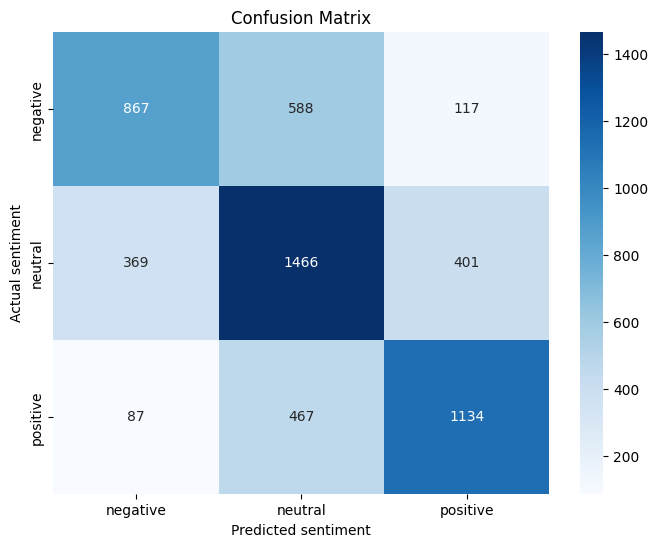

In [171]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix to evaluate model performance
conf_matrix = confusion_matrix(y_test, y_pred)

# Get unique sentiment labels and sort them for visualization
unique_sentiments = sorted(set(y_test) | set(y_pred))

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=unique_sentiments, 
            yticklabels=unique_sentiments)

plt.xlabel("Predicted sentiment")
plt.ylabel("Actual sentiment")
plt.title("Confusion Matrix")
plt.show()


## 4. "ChatGPT_tweets" preprocessing

In [172]:
# Read the CSV file
df2 = pd.read_csv("ChatGPT_tweets.csv")

# Display the first five rows of the DataFrame
df2.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Tushar Gupta at DevFest Raipur.,Is this the end of Twitter threads?\n#AI #Chat...,India,•Experiencing Life💬 && Tech🥑 •Learning about💻:...,2021-10-05 05:05:55+00:00,230.0,438.0,1567,False,2022-12-20 13:29:08+00:00,"['AI', 'ChatGPT']",Twitter for Android
1,PharmaTechnologyTrends,ChatGPT is a truly mind-blowing tool and playi...,"Frankfurt am Main, Deutschland",Latest News and Trends in Pharmaceutical Industry,2022-11-06 21:03:59+00:00,264.0,4333.0,24,False,2022-12-20 13:28:50+00:00,NaN,EveryoneSocial
2,Richard Kim,#ChatGPT can be used to generate malicious cod...,NaN,"News, papers, and books on AI, Machine Learnin...",2010-05-06 00:20:48+00:00,4481.0,4982.0,18412,False,2022-12-20 13:28:39+00:00,"['ChatGPT', 'code', 'chatgpt', 'language', 'ai...",shem0304
3,GiamMa-based researchers SDR R&D IoT,Use prompt hack to bypass OpenAI's content pol...,NaN,#ArtTechnology #IT #Hardware #Security #OSINT ...,2020-08-29 09:30:40+00:00,1996.0,1190.0,19528,False,2022-12-20 13:28:09+00:00,NaN,Twitter Web App
4,"Bobby Davis, Jr.",Why #chatgpt will never replace devs. \n\nhttp...,North Carolina,CEO @CoderFoundry\nAuthor: Breaking the Code h...,2012-06-25 17:36:19+00:00,1182.0,245.0,888,False,2022-12-20 13:27:10+00:00,['chatgpt'],Twitter for Android


In [173]:
# Extract the "text" column from the DataFrame
chat_gpt_text = df2["text"]

# Drop any rows with missing values in the "text" column
chat_gpt_text = chat_gpt_text.dropna()

In [174]:
# Process the text by applying the tweet processing function
chat_gpt_processed = process_tweet(chat_gpt_text)

# Display the first 10 processed tweets
chat_gpt_processed[:10]


['end twitter thread',
 'chatgpt truli mind-blow tool play around definit send rabbit hole also actual help market content creation five way leverag chatgpt workflow',
 'use gener malici code find research',
 "use prompt hack bypass openai 's content polici restrict golfzert amp openai chatgpt hackerish thing nodatafound",
 'never replac dev',
 "'d start blog/video short statement lot data come 'll give detail end articl go main topic end articl give detail opinion 1/2",
 'think great explan chatgpt saga glad hope scare ...',
 'want quick introduct potenti implic articl everyon els alreadi date articl use explain go non-tech friend 😉',
 'late parti ’ herald age consum 👩🏻\u200d💻',
 'input']

## 5. "ChatGPT_tweets" sentiment prediction

In [175]:
# Fit the vectorizer to the training data and transform it into count vectors
x_train_counts = vectorizer.fit_transform(x_train)

# Transform the new test data (chat_gpt_processed) into count vectors using the same vectorizer 
x_chat_gpt_counts = vectorizer.transform(chat_gpt_processed)

# Predict the labels for the new count vectors using the same classifier trained on the training data
y_pred_chat_gpt = classifier.predict(x_chat_gpt_counts)

In [176]:
from collections import Counter

# Count the occurrences of each label in y_pred_chat_gpt
label_counts = Counter(y_pred_chat_gpt)

# Print the label counts
print(dict(label_counts))

{'neutral': 25510, 'negative': 5131, 'positive': 8413}


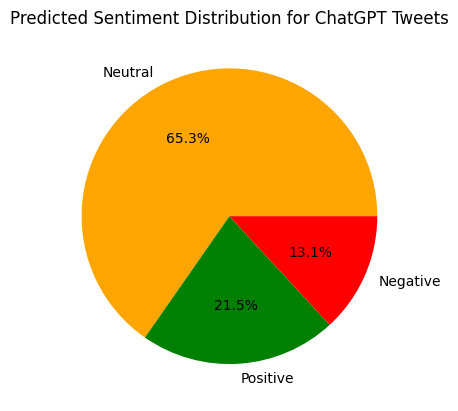

In [177]:
import matplotlib.pyplot as plt

# Define the labels and counts
labels = ['Neutral', 'Positive', 'Negative']
counts = [label_counts['neutral'], label_counts['positive'], label_counts['negative']]

# Define colors for each label
colors = ['orange', 'green', 'red']

# Create the pie plot
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')

# Add title
plt.title("Predicted Sentiment Distribution for ChatGPT Tweets")

plt.show()

In [178]:
# Create a dictionary to store tweets categorized by predicted sentiment
sentiment_tweets = {}

# Iterate over predicted sentiments and corresponding tweets
for sentiment, tweet in zip(y_pred_chat_gpt, chat_gpt_text):
    # Append tweet to the list corresponding to its predicted sentiment
    if sentiment in sentiment_tweets:
        sentiment_tweets[sentiment].append(tweet)
    else:
        sentiment_tweets[sentiment] = [tweet]

# Print examples of tweets for each sentiment category
print("Example of tweet with positive sentiment:", sentiment_tweets["positive"][0])  
print("Example of tweet with negative sentiment:", sentiment_tweets["negative"][0])  
print("Example of tweet with neutral sentiment:", sentiment_tweets["neutral"][0])


Example of tweet with positive sentiment: I think this is a great explanation about the ChatGPT saga. We should be glad and hopeful, not scared...

https://t.co/AVnpyJTQvX

#ChatGPT
Example of tweet with negative sentiment: Why #chatgpt will never replace devs. 

https://t.co/D7RN1B9MTI
Example of tweet with neutral sentiment: Is this the end of Twitter threads?
#AI #ChatGPT @OpenAI https://t.co/h7oNHwCvzy


## 6. Bonus analyses

### A. Most common hashtags in "ChatGPT_tweets"

In [179]:
# Define a regular expression pattern to match hashtags
regex = r"#\S+"

# Extract hashtags from each tweet in chat_gpt_text using the regex
hashtags = chat_gpt_text.str.findall(regex)

# Count the occurrences of each hashtag across all tweets and sort them in descending order
sorted_hashtags = pd.Series(re.findall(regex, " ".join(chat_gpt_text))).value_counts().sort_values(ascending=False)

# Display the top 20 most frequent hashtags
sorted_hashtags.head(20)


#ChatGPT                   30227
#AI                         3510
#chatgpt                    3332
#OpenAI                     2632
#chatGPT                    2565
#ai                         1378
#ChatGPT.                    843
#ChatGPT,                    773
#openai                      717
#ArtificialIntelligence      671
#chatgpt3                    418
#GPT3                        383
#GPT                         368
#MachineLearning             346
#chatbot                     308
#web3                        279
#StableDiffusion2            273
#OpenAi                      273
#DallE                       256
#MidJourney                  256
Name: count, dtype: int64

In [180]:
# Concatenate all tweets into a single string and convert to lowercase
hashtags = " ".join(chat_gpt_text).lower()

# Use regular expression to remove punctuation signs from hashtags and extract cleaned hashtags
clean_hashtags = re.findall(r"#\w+", hashtags)

# Count the occurrences of each cleaned hashtag and sort them in descending order
sorted_hashtags = pd.Series(clean_hashtags).value_counts().sort_values(ascending=False)

# Display the top 20 most frequent hashtags
sorted_hashtags.head(20)


#chatgpt                   39599
#ai                         5134
#openai                     4074
#artificialintelligence      937
#gpt3                        578
#machinelearning             511
#chatgpt3                    494
#midjourney                  485
#gpt                         464
#chatbot                     423
#web3                        415
#dalle                       367
#eth                         338
#google                      338
#nft                         329
#aiart                       284
#stablediffusion2            275
#technology                  250
#crypto                      248
#openaichat                  247
Name: count, dtype: int64

In [181]:
# Convert the sorted hashtags Series to a DataFrame
df_sorted_hashtags = sorted_hashtags.reset_index()

# Rename the columns to "hashtag" and "count"
df_sorted_hashtags.columns = ["hashtag", "count"]

# Print the number of unique hashtags in the DataFrame
df_sorted_hashtags["hashtag"].nunique()

10204

In [182]:
# Select the top 100 most common hashtags from the sorted DataFrame
most_common_hashtags = df_sorted_hashtags[:100]

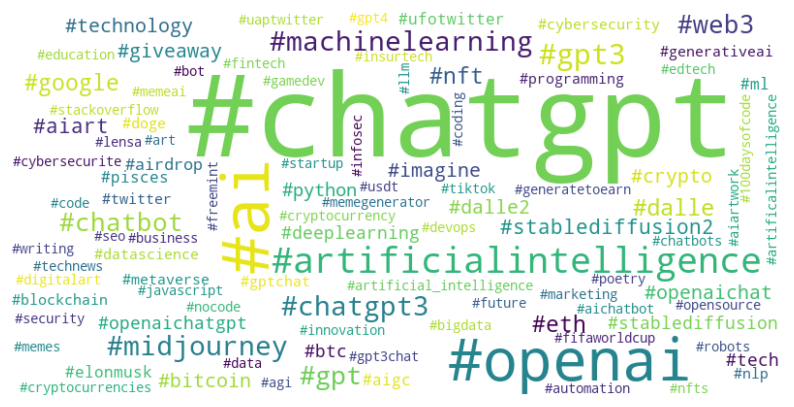

In [183]:
from wordcloud import WordCloud

# Create a dictionary with the most 100 common hashtags
word_count_dict = dict(zip(most_common_hashtags["hashtag"], most_common_hashtags["count"]))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### B. Most similar words in "ChatGPT_tweets"

In [184]:
from gensim.models import Word2Vec

# Tokenize the chat_gpt_text
chat_gpt_tokens = tokenizing(chat_gpt_text)

# Convert all tokens to lowercase
chat_gpt_tokens = [[word.lower() for word in tweet] for tweet in chat_gpt_tokens]

# Train a Word2Vec word embeddings model on the tokenized chat_gpt_text data
model = Word2Vec(chat_gpt_tokens, vector_size=100, window=5, min_count=1, workers=2, sg=1)

# Words similar to "chatgpt" and their similarity score
similar_to_chat_gpt = model.wv.most_similar(["chatgpt"], topn=10)
similar_to_chat_gpt

[('chatgtp', 0.8158158659934998),
 ('ia', 0.8054111003875732),
 ('🤓', 0.8001535534858704),
 ('🤖', 0.7938838601112366),
 ('🙃', 0.7935296297073364),
 ('nowadays', 0.7810184359550476),
 ('😲', 0.7783744931221008),
 ('👌', 0.7781409025192261),
 ('🔥🔥', 0.7764498591423035),
 ('😏', 0.7759978771209717)]

In [185]:
import emoji

def remove_emoticons(tweets):
    # Remove emoticons using the emoji library
    text_no_emoticons = [emoji.demojize(tweet) for tweet in tweets]
    return text_no_emoticons

no_emoticons = remove_emoticons(chat_gpt_text)

In [186]:
# Tokenize the text without emoticons
chat_gpt_no_emoticons = tokenizing(no_emoticons)

# Convert all tokens to lowercase
chat_gpt_no_emoticons = [[word.lower() for word in tweet] for tweet in chat_gpt_no_emoticons]

# Train a Word2Vec word embeddings model on the tokenized chat_gpt_no_emoticons data
model = Word2Vec(chat_gpt_no_emoticons, vector_size=100, window=5, min_count=1, workers=2, sg=1)

# Find words similar to "chatgpt" and their similarity scores
similar_to_chat_gpt = model.wv.most_similar(["chatgpt"], topn=10)
similar_to_chat_gpt

[('chatgtp', 0.801907479763031),
 ('artificial_intelligence', 0.7784327864646912),
 ('artificalintelligence', 0.7780460715293884),
 ('chatgpt…', 0.7778963446617126),
 ('red_question_mark', 0.776387631893158),
 ('astonished_face', 0.7725408673286438),
 ('ia', 0.769824206829071),
 ('turingtest', 0.7693629860877991),
 ('speech_balloon', 0.768878161907196),
 ('unbelievable', 0.7683150768280029)]

In [187]:
# Find words similar to "ai" and their similarity scores
similar_to_ai = model.wv.most_similar(["ai"], topn=10)
similar_to_ai 

[('artificial_intelligence', 0.8043500781059265),
 ('a.i', 0.8009867668151855),
 ('robots', 0.7890529036521912),
 ('robotic', 0.772676944732666),
 ('entrepreneur', 0.7721567153930664),
 ('chatgtp', 0.7704266309738159),
 ('ia', 0.7700345516204834),
 ('aichatbot', 0.7623913288116455),
 ('lensa', 0.7599857449531555),
 ('turingtest', 0.7591895461082458)]